In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

In [2]:
plt.rc('figure', figsize=(7,4))

In [3]:
iris = datasets.load_iris()
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_name = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [4]:
# Building and running model
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [5]:
# Plotting model outputs
iris_df = pd.DataFrame(iris.data)
iris_df.columns =['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Targets']

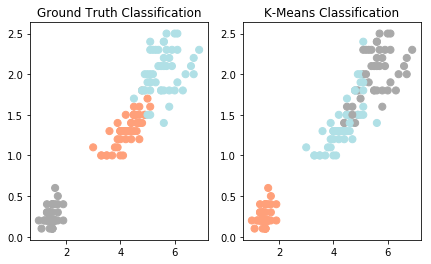

In [6]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

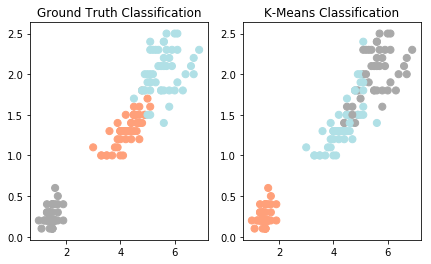

In [7]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [8]:
# Evaluate clustering results
print(classification_report(y,relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

